# Condominium Analysis II

## Manhattan, New York (2010 - 2011)

This is a short visualization and supervised learning analysis of the Condiminium market in Manhattan, New York. This data was gathered by the city for the years 2010 to 2011. I also have data that represents the crime levels in the various neighborhoods of Manhattan. Every year as your **C**heif Data Scientist, I have to conduct this study which requires me to

 * **A**ssemble
 * **C**lean
 * **E**xplore (Supervised Learning, Prediction)
 * **S**ummarize
 
the data.
The Department of Finance (DOF) is required by NY State law to value condominiums or cooperatives as if they were residential 
rental apartment buildings. DOF uses income information from rental properties similar in physical features and location to 
the condominiums or cooperatives. DOF applies this income data to the condominium or cooperative and determine its value in 
the same way DOF values rental apartment buildings. Update Schedule: Annually

The overall goal of the project is to study if there is a correlation between complaints in a neighborhood and the market value per sqft of the condominiums. Complaints might not necessary affect an area negatively. We have to keep in mind that some neighborhoods might be popular or high traffic zones which will can lead to more grumble among the citizens that live there. The features are both crime and related values to a condominium. The **Market Value per Sqft**, is the **tarket variable**.

**Target Variable: Market Value per Sqft**

In [172]:
#Import the modules and libraries to conduct this study

#Enable inline plotting
%matplotlib inline

#Import all libraries for this analysis
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
from ggplot import *
import pandas as pd
import numpy as np
import seaborn as sns
from __future__ import division

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [173]:
#The data was collected from the website NYC Open Data.  

#Load in the Data (using pandas to open up the data set)
Location = r"C:\Users\James\Desktop\Data_Science_Class\DOF__Condominium_Comparable_Rental_Income___Manhattan___FY_2011_2012.csv"
dataset = pd.read_csv(Location)

In [174]:
# Make the data loaded in a DataFrame. "Two-dimensional size-mutable, potentially heterogeneous tabular data structure 
# with labeled axes (rows and columns). Arithmetic operations align on both row and column labels."

original_df = pd.DataFrame(data = dataset)
df = original_df

Cleaning up the data and deleting a few columns 
Columns Deleting were
* Boro-Block-Lot (Condos)
* Condo Section
* Boro-Block-Lot 1, 2, 3 (Apartment Comparisons)

In [175]:
# Part of the data process, is cleaning up the data and making it acceptable to use and work with. Here we delete a few 
# columns that is not needed.

del df['MANHATTAN \xc3\xa2\xc2\x80\xc2\x93 CONDOMINIUMS COMPARABLE PROPERTIES \xc3\xa2\xc2\x80\xc2\x93 Boro-Block-Lot']
del df['MANHATTAN \xc3\xa2\xc2\x80\xc2\x93 CONDOMINIUMS COMPARABLE PROPERTIES \xc3\xa2\xc2\x80\xc2\x93 Condo Section']
del df['COMPARABLE RENTAL \xc3\xa2\xc2\x80\xc2\x93 1 \xc3\xa2\xc2\x80\xc2\x93 Boro-Block-Lot']
del df['COMPARABLE RENTAL \xc3\xa2\xc2\x80\xc2\x93 2 \xc3\xa2\xc2\x80\xc2\x93 Boro-Block-Lot']
del df['COMPARABLE RENTAL \xc3\xa2\xc2\x80\xc2\x93 3 \xc3\xa2\xc2\x80\xc2\x93 Boro-Block-Lot']

In [176]:
# Also changing the column names to be more presentable. 

df.columns = ['Address','Neighborhood', 'Building Classification', 'Total Units', 'Year Built', 'Gross SqFt', 'Estimated Gross Income',
 'Gross Income per SqFt', 'Estimated Expense', 'Expense per SqFt', 'Net Operating Income', 'Full Market Value',
 'Market Value per SqFt', 'Address1', 'Neighborhood1', 'Building Classification1', 'Total Units1', 'Year Built1', 'Gross SqFt1',
 'Estimated Gross Income1', 'Gross Income per SqFt1', 'Estimated Expense1', 'Expense per SqFt1', 'Net Operating Income1',
 'Full Market Value1', 'Market Value per SqFt1', 'Distance from Condo in miles1', 'Address2', 'Neighborhood2', 'Building Classification2',
 'Total Units2', 'Year Built2', 'Gross SqFt2', 'Estimated Gross Income2', 'Gross Income per SqFt2', 'Estimated Expense2',
 'Expense per SqFt2', 'Net Operating Income2', 'Full Market Value2', 'Market Value per SqFt2', 'Distance from Condo in miles2',
 'Address3', 'Neighborhood3', 'Building Classification3', 'Total Units3', 'Year Built3', 'Gross SqFt3', 'Estimated Gross Income3',
 'Gross Income per SqFt3', 'Estimated Expense3', 'Expense per SqFt3', 'Net Operating Income3', 'Full Market Value3',
 'Market Value per SqFt3', 'Distance from Condo in miles3']

In [177]:
# The data set has condominiums and comparable apartments. We are only interested in the condominiums. We create a new 
# dataframe with only columns that we would like to work with

df_Condo = df[['Address','Neighborhood', 'Total Units', 'Year Built', 'Estimated Gross Income','Market Value per SqFt']]
df_Condo.head()

,Address,Neighborhood,Total Units,Year Built,Estimated Gross Income,Market Value per SqFt
0,1 COENTIES SLIP,FINANCIAL,42,1920,1332615,200.00
1,39 WHITEHALL STREET,FINANCIAL,78,1985,6633257,242.76
2,17 BATTERY PLACE,FINANCIAL,500,NaN,17310000,164.15
3,20 WEST STREET,FINANCIAL,282,1930,11776313,271.23
4,377 RECTOR PLACE,TRIBECA,239,1985,10004582,247.48


In [178]:
df_Condo.describe()

,Total Units,Year Built,Estimated Gross Income,Market Value per SqFt
count,1381.000000,1380.000000,1381.000000,1380.000000
mean,88.535844,1953.778986,4182433.007241,180.580732
std,119.796184,40.941668,5700578.195518,56.079468
min,1.000000,1836.000000,40000.000000,12.690000
25%,18.000000,1915.000000,879758.000000,141.262500
50%,43.000000,1956.000000,2131841.000000,183.585000
75%,109.000000,1997.000000,4921764.000000,222.330000
max,1258.000000,2009.000000,56010967.000000,399.380000


In [179]:
#Cleaning up the data by getting rid of NaN values
df_Condo[df_Condo['Year Built'].isnull()]
df_Condo1 = df_Condo.dropna()
df_Condo1.describe()

,Total Units,Year Built,Estimated Gross Income,Market Value per SqFt
count,1379.000000,1379.000000,1379.000000,1379.000000
mean,88.300943,1953.803481,4175531.943437,180.592647
std,119.346041,40.946403,5692906.659019,56.098065
min,1.000000,1836.000000,40000.000000,12.690000
25%,18.500000,1915.000000,883171.000000,141.175000
50%,43.000000,1956.000000,2131841.000000,183.590000
75%,109.000000,1997.000000,4906379.500000,222.330000
max,1258.000000,2009.000000,56010967.000000,399.380000


In [180]:
# Lets explore the types of objects are in the columns
df_Condo1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1380
Data columns (total 6 columns):
Address                   1379 non-null object
Neighborhood              1379 non-null object
Total Units               1379 non-null int64
Year Built                1379 non-null float64
Estimated Gross Income    1379 non-null int64
Market Value per SqFt     1379 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 75.4+ KB


## Visualizations

In [181]:
# Compare Neighborhoods

Neighborhood_count = df_Condo1.groupby('Neighborhood').mean()
Neighborhood_count.head()

,Total Units,Year Built,Estimated Gross Income,Market Value per SqFt
Neighborhood,,,,
ALPHABET CITY,25.083333,1968.041667,780207.291667,148.355000
CHELSEA,67.556818,1955.477273,3425197.238636,215.949318
CHINATOWN,42.761905,1950.619048,1510241.428571,154.179524
CIVIC CENTER,25.956522,1914.391304,2062381.608696,174.066957
CLINTON,144.129032,1981.774194,5551377.354839,176.700323


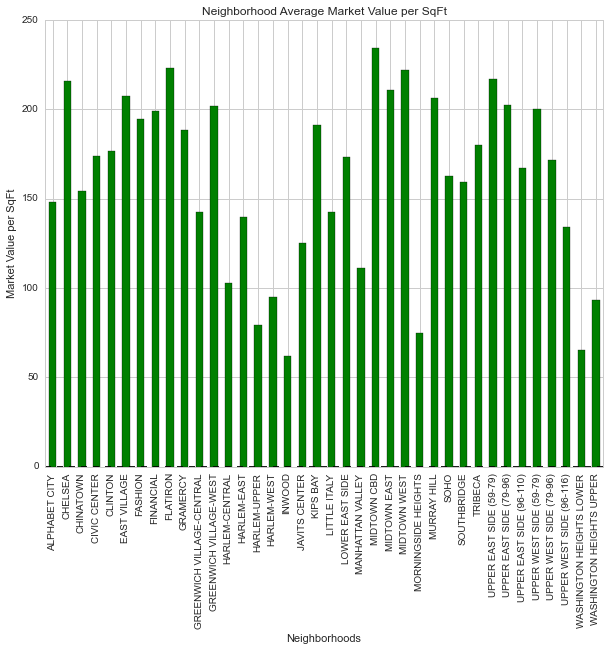

In [182]:
#A bar graph demonstrating the average square footage of Condominiums in New York Manhattan Neighborhoods
fig6 = plt.figure()
Neighborhood_count['Market Value per SqFt'].plot(kind = 'bar', figsize = (10,8), color = 'green')
plt.xlabel('Neighborhoods')
plt.ylabel('Market Value per SqFt')
plt.title('Neighborhood Average Market Value per SqFt')
plt.show()
fig6.savefig('NeighborhoodAverageMarket.png')

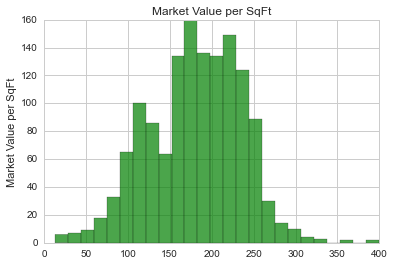

In [183]:
# Market Value per SqFt with only 25 bins
fig = plt.figure()
df_Condo1['Market Value per SqFt'].hist(bins =25, color = 'g', alpha = 0.7)
plt.ylabel('Market Value per SqFt')
plt.title('Market Value per SqFt')
plt.show()
fig.savefig('MarketValueperSqft.png')

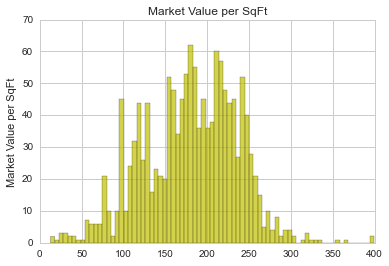

In [184]:
# Market Value per SqFt with only 75 bins
plt.figure()
df_Condo1['Market Value per SqFt'].hist(bins =75, color = 'y', alpha = 0.7)
plt.ylabel('Market Value per SqFt')
plt.title('Market Value per SqFt')
plt.show()

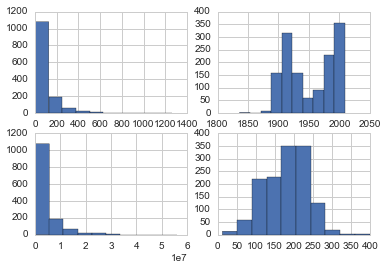

In [185]:
# Lets Examine the graphs of the other Features So far.

fig, ax = plt.subplots(nrows=2, ncols=2,)

ax[0, 0].hist(df_Condo1['Total Units'])
ax[0, 1].hist(df_Condo1['Year Built'])
ax[1, 0].hist(df_Condo1['Estimated Gross Income'])
ax[1, 1].hist(df_Condo1['Market Value per SqFt'])

plt.show()

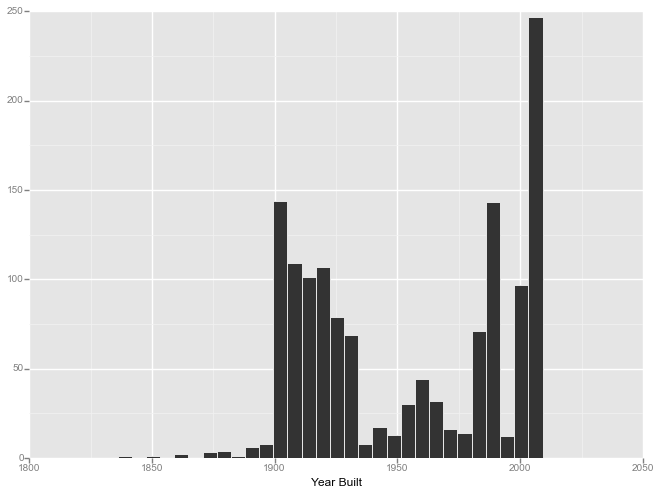

<ggplot: (69931044)>

In [186]:
ggplot(aes(x='Year Built'),df_Condo1) + geom_bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000022AA50B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000018194C88>]], dtype=object)

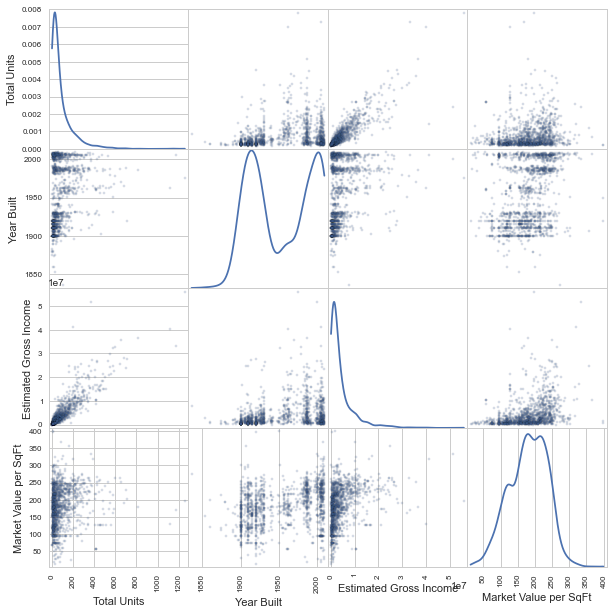

In [187]:
pd.scatter_matrix(df_Condo1, figsize=[10, 10], alpha=0.2, diagonal='kde')

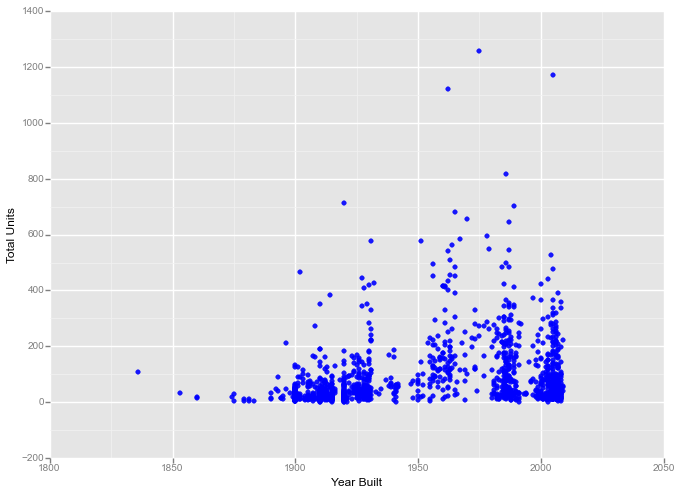

<ggplot: (36459657)>

In [188]:
ggplot(df_Condo1,aes('Year Built','Total Units'))+geom_point(alpha = 0.9, color = 'blue')

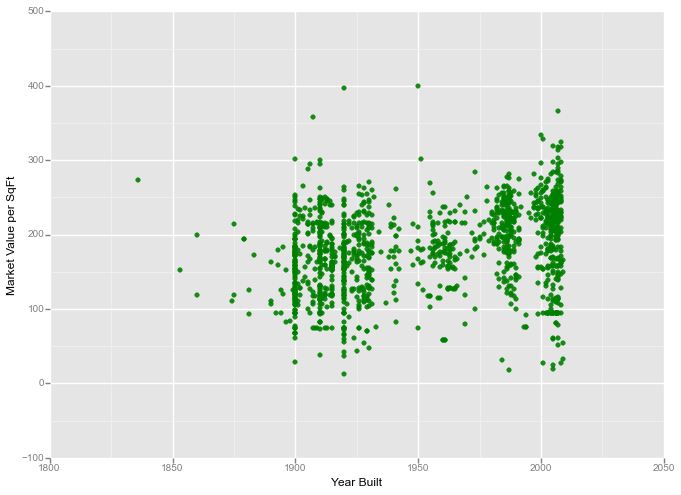

<ggplot: (25729666)>

In [189]:
ggplot(df_Condo1,aes('Year Built','Market Value per SqFt'))+geom_point(alpha = 0.9, color = 'green')

In [190]:
df_Condo1['Building Age'] = 2011-df_Condo1['Year Built']

c:\Users\James\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [191]:
df_Condo1['Building Age'].head(5)

0    91
1    26
3    81
4    26
5    25
Name: Building Age, dtype: float64

In [192]:
df_Condo1.head(10)

,Address,Neighborhood,Total Units,Year Built,Estimated Gross Income,Market Value per SqFt,Building Age
0,1 COENTIES SLIP,FINANCIAL,42,1920,1332615,200.00,91
1,39 WHITEHALL STREET,FINANCIAL,78,1985,6633257,242.76,26
3,20 WEST STREET,FINANCIAL,282,1930,11776313,271.23,81
4,377 RECTOR PLACE,TRIBECA,239,1985,10004582,247.48,26
5,320 ALBANY STREET,TRIBECA,133,1986,5127687,191.37,25
6,250 SOUTH END AVENUE,TRIBECA,109,1985,4365900,211.53,26
7,300 ALBANY STREET,TRIBECA,107,1986,3637377,222.33,25
8,380 RECTOR PLACE,TRIBECA,247,1987,11246946,259.21,24
9,280 RECTOR PLACE,TRIBECA,121,1985,4115683,205.62,26
10,300 RECTOR PLACE,TRIBECA,154,1986,5239413,222.34,25


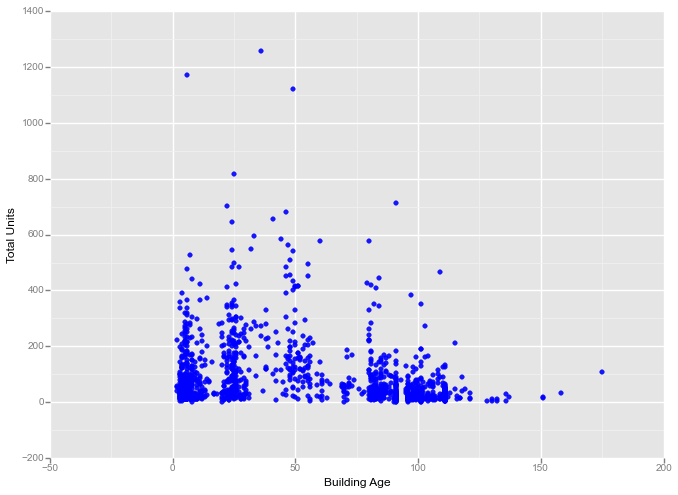

<ggplot: (36165033)>

In [193]:
ggplot(df_Condo1,aes('Building Age','Total Units'))+geom_point(alpha = 0.9, color = 'blue')

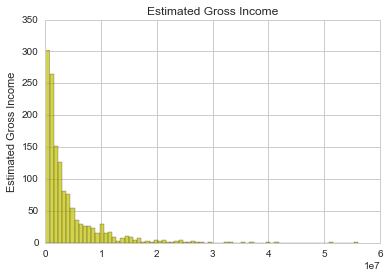

In [194]:
# Market Value per SqFt with only 75 bins
#plt.figure()
df_Condo1['Estimated Gross Income'].hist(bins =75, color = 'y', alpha = 0.7)
plt.ylabel('Estimated Gross Income')
plt.title('Estimated Gross Income')
plt.show()
#plt.savefig('EstimatedGrossIncome.png')

In [195]:
df_Condo1['Estimated Gross Income'].head()

0     1332615
1     6633257
3    11776313
4    10004582
5     5127687
Name: Estimated Gross Income, dtype: int64

In [196]:
df_Condo1['Estimated Gross Income Log'] = np.log(df_Condo1['Estimated Gross Income'])

c:\Users\James\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


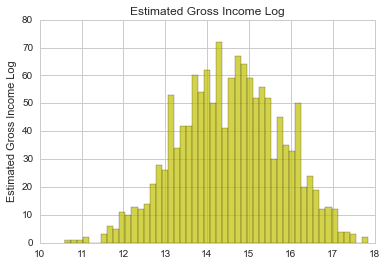

In [197]:
# Market Value per SqFt with only 75 bins
plt.figure()
df_Condo1['Estimated Gross Income Log'].hist(bins =50, color = 'y', alpha = 0.7)
plt.ylabel('Estimated Gross Income Log')
plt.title('Estimated Gross Income Log')
plt.show()

In [198]:
df_Condo1['Estimated Gross Income Log'].head()

0    14.102654
1    15.707606
3    16.281601
4    16.118554
5    15.450165
Name: Estimated Gross Income Log, dtype: float64

In [199]:
df_Condo1.head()

,Address,Neighborhood,Total Units,Year Built,Estimated Gross Income,Market Value per SqFt,Building Age,Estimated Gross Income Log
0,1 COENTIES SLIP,FINANCIAL,42,1920,1332615,200.00,91,14.102654
1,39 WHITEHALL STREET,FINANCIAL,78,1985,6633257,242.76,26,15.707606
3,20 WEST STREET,FINANCIAL,282,1930,11776313,271.23,81,16.281601
4,377 RECTOR PLACE,TRIBECA,239,1985,10004582,247.48,26,16.118554
5,320 ALBANY STREET,TRIBECA,133,1986,5127687,191.37,25,15.450165


In [200]:
df_Condo2 = df_Condo1

In [201]:
# Delete Estimated Gross Income and Year Built and  will compare and contrast the results of Estimated Gross Income versus 
# Estimated Gross Income Log

In [202]:
del df_Condo2['Year Built']
del df_Condo2['Estimated Gross Income']
df_Condo2.head(5)

,Address,Neighborhood,Total Units,Market Value per SqFt,Building Age,Estimated Gross Income Log
0,1 COENTIES SLIP,FINANCIAL,42,200.00,91,14.102654
1,39 WHITEHALL STREET,FINANCIAL,78,242.76,26,15.707606
3,20 WEST STREET,FINANCIAL,282,271.23,81,16.281601
4,377 RECTOR PLACE,TRIBECA,239,247.48,26,16.118554
5,320 ALBANY STREET,TRIBECA,133,191.37,25,15.450165


In [203]:
# This study will merge another data set which has the Crime statistics of New York City. The file came from the 311 open data
# requests. The original data file was 479,650 KB and had 311 requests from all over New York City. We are only interested in 
# crime statistics that concern Manhattan so the data had to be cleaned up. Also, to identify the locations (Neighborhood) of 
# the crime by Neighborhood, the zipcodes were used.

Crime = pd.read_csv("C:\Users\James\Desktop\Data_Science_Class\Crime_Manhattan.csv")
Crime.head(5)

,Unnamed: 0,Created Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location,Unspecified,Neighborhood
0,3,2/13/2015 2:04,Rodent,Rat Sighting,3+ Family Apt. Building,10002,151 NORFOLK STREET,NORFOLK STREET,LATLONG,NEW YORK,MANHATTAN,988005,201746,40.720422,-73.986454,"(40.72042209134668, -73.98645362302278)",0,lower east side
1,9,2/13/2015 1:58,Taxi Complaint,Driver Complaint,NaN,10025,300 WEST 109 STREET,WEST 109 STREET,ADDRESS,NEW YORK,MANHATTAN,993260,232085,40.803691,-73.967455,"(40.80369104095935, -73.96745524807574)",0,morningside heights
2,12,2/13/2015 1:53,Noise - Commercial,Banging/Pounding,Store/Commercial,10009,215 AVENUE A,AVENUE A,ADDRESS,NEW YORK,MANHATTAN,989593,205212,40.729935,-73.980722,"(40.729934602984734, -73.98072207070948)",0,gramercy
3,16,2/13/2015 1:46,Noise - Commercial,Banging/Pounding,Store/Commercial,10038,59 JOHN STREET,JOHN STREET,ADDRESS,NEW YORK,MANHATTAN,982167,197541,40.708881,-74.007513,"(40.708880922761544, -74.00751324040145)",0,southbridge
4,22,2/13/2015 1:41,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10003,78 EAST 4 STREET,EAST 4 STREET,ADDRESS,NEW YORK,MANHATTAN,987017,203934,40.726428,-73.990017,"(40.72642798567867, -73.99001698985559)",0,gramercy


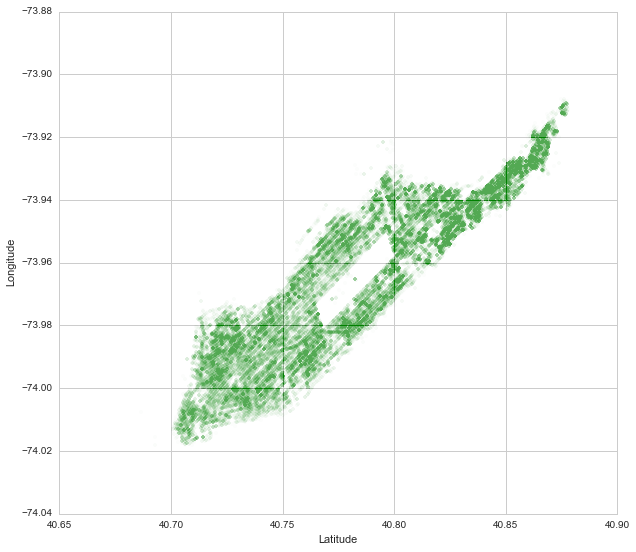

In [204]:
# Visualize where the data is located. Clearly we can see complaints coming from all over the city.

Lat_Long = Crime[['Latitude','Longitude']]
Lat_Long1 = Lat_Long.dropna()
fig2 = plt.figure(figsize = (10,9), dpi = 80)
plt.scatter(Lat_Long1['Latitude'], Lat_Long1['Longitude'], color ='g', alpha = 0.01)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
fig2.savefig('CrimeComplaints.png')

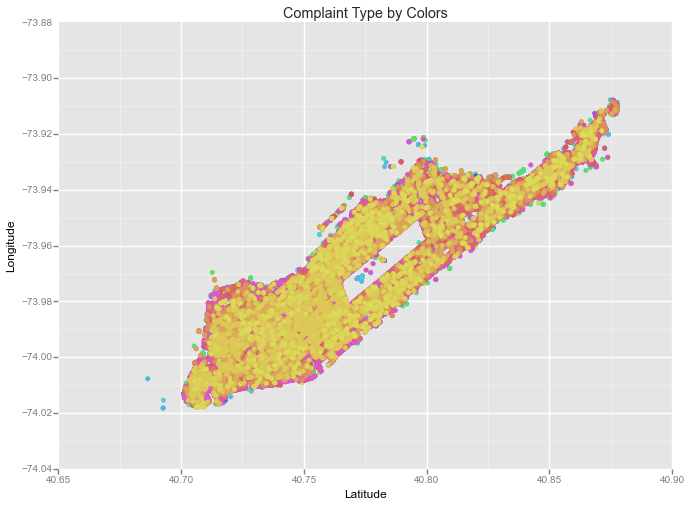

<ggplot: (25624250)>

In [205]:
# There are 173 unique Complaint Types

ggplot(Crime, aes(x='Latitude', y='Longitude', color='Complaint Type')) + geom_point()+ xlab("Latitude") +\
ylab("Longitude") + ggtitle("Complaint Type by Colors")



In [206]:
# We create dummy variables on the categoricals variable of complaint type
Complaint_Dummies = pd.get_dummies(Crime['Complaint Type'])

In [207]:
#Join the dummies data to the dataframe of Crime

data = Crime.join(Complaint_Dummies)
data.head(5)

,Unnamed: 0,Created Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location,Unspecified,Neighborhood,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,...,Tanning,Tattooing,Taxi Complaint,Taxi Report,Traffic,Traffic Signal Condition,Transportation Provider Complaint,Tunnel Condition,UNSANITARY CONDITION,Unleashed Dog,Unsanitary Animal Facility,Unsanitary Animal Pvt Property,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,WATER LEAK,WLWP,WNW,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
0,3,2/13/2015 2:04,Rodent,Rat Sighting,3+ Family Apt. Building,10002,151 NORFOLK STREET,NORFOLK STREET,LATLONG,NEW YORK,MANHATTAN,988005,201746,40.720422,-73.986454,"(40.72042209134668, -73.98645362302278)",0,lower east side,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,2/13/2015 1:58,Taxi Complaint,Driver Complaint,NaN,10025,300 WEST 109 STREET,WEST 109 STREET,ADDRESS,NEW YORK,MANHATTAN,993260,232085,40.803691,-73.967455,"(40.80369104095935, -73.96745524807574)",0,morningside heights,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12,2/13/2015 1:53,Noise - Commercial,Banging/Pounding,Store/Commercial,10009,215 AVENUE A,AVENUE A,ADDRESS,NEW YORK,MANHATTAN,989593,205212,40.729935,-73.980722,"(40.729934602984734, -73.98072207070948)",0,gramercy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16,2/13/2015 1:46,Noise - Commercial,Banging/Pounding,Store/Commercial,10038,59 JOHN STREET,JOHN STREET,ADDRESS,NEW YORK,MANHATTAN,982167,197541,40.708881,-74.007513,"(40.708880922761544, -74.00751324040145)",0,southbridge,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,22,2/13/2015 1:41,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10003,78 EAST 4 STREET,EAST 4 STREET,ADDRESS,NEW YORK,MANHATTAN,987017,203934,40.726428,-73.990017,"(40.72642798567867, -73.99001698985559)",0,gramercy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [208]:
data1 = data[['Neighborhood','Taxi Complaint', 'Noise - Commercial','Food Establishment', 'Noise - Vehicle','Street Condition','Noise - Street/Sidewalk',
'Sidewalk Condition','Traffic','Graffiti','Elevator','School Maintenance','DOF Property - Reduction Issue','Root/Sewer/Sidewalk Condition',
'Overgrown Tree/Branches','Construction','Noise']]

In [209]:
data1.head(5)

,Neighborhood,Taxi Complaint,Noise - Commercial,Food Establishment,Noise - Vehicle,Street Condition,Noise - Street/Sidewalk,Sidewalk Condition,Traffic,Graffiti,Elevator,School Maintenance,DOF Property - Reduction Issue,Root/Sewer/Sidewalk Condition,Overgrown Tree/Branches,Construction,Noise
0,lower east side,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,morningside heights,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,gramercy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,southbridge,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,gramercy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [210]:
data1[data1['Neighborhood'].isnull()]
data1 = data1.dropna()
data1.head()

,Neighborhood,Taxi Complaint,Noise - Commercial,Food Establishment,Noise - Vehicle,Street Condition,Noise - Street/Sidewalk,Sidewalk Condition,Traffic,Graffiti,Elevator,School Maintenance,DOF Property - Reduction Issue,Root/Sewer/Sidewalk Condition,Overgrown Tree/Branches,Construction,Noise
0,lower east side,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,morningside heights,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,gramercy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,southbridge,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,gramercy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [211]:
Crime_counts = data1.groupby('Neighborhood').sum()
Crime_counts.head()

,Taxi Complaint,Noise - Commercial,Food Establishment,Noise - Vehicle,Street Condition,Noise - Street/Sidewalk,Sidewalk Condition,Traffic,Graffiti,Elevator,School Maintenance,DOF Property - Reduction Issue,Root/Sewer/Sidewalk Condition,Overgrown Tree/Branches,Construction,Noise
Neighborhood,,,,,,,,,,,,,,,,
civic center,70,21,26,17,41,69,9,3,7,2,2,0,0,0,0,185
clinton,432,456,131,67,182,253,30,87,8,77,1,13,4,5,2,738
financial,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
flatiron,163,116,36,32,50,65,8,11,11,30,7,2,0,4,0,407
gramercy,388,1065,154,170,295,511,67,21,120,61,12,22,7,29,0,1106


In [212]:
Crime_counts = Crime_counts.reset_index()
Crime_counts.head(4)

,Neighborhood,Taxi Complaint,Noise - Commercial,Food Establishment,Noise - Vehicle,Street Condition,Noise - Street/Sidewalk,Sidewalk Condition,Traffic,Graffiti,Elevator,School Maintenance,DOF Property - Reduction Issue,Root/Sewer/Sidewalk Condition,Overgrown Tree/Branches,Construction,Noise
0,civic center,70,21,26,17,41,69,9,3,7,2,2,0,0,0,0,185
1,clinton,432,456,131,67,182,253,30,87,8,77,1,13,4,5,2,738
2,financial,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
3,flatiron,163,116,36,32,50,65,8,11,11,30,7,2,0,4,0,407


In [213]:
def uppercaseone(value):
    value = value.upper()
    return value

Crime_counts['Neighborhood'] = Crime_counts['Neighborhood'].apply(uppercaseone)
Crime_counts.head(4)

,Neighborhood,Taxi Complaint,Noise - Commercial,Food Establishment,Noise - Vehicle,Street Condition,Noise - Street/Sidewalk,Sidewalk Condition,Traffic,Graffiti,Elevator,School Maintenance,DOF Property - Reduction Issue,Root/Sewer/Sidewalk Condition,Overgrown Tree/Branches,Construction,Noise
0,CIVIC CENTER,70,21,26,17,41,69,9,3,7,2,2,0,0,0,0,185
1,CLINTON,432,456,131,67,182,253,30,87,8,77,1,13,4,5,2,738
2,FINANCIAL,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
3,FLATIRON,163,116,36,32,50,65,8,11,11,30,7,2,0,4,0,407


In [214]:
del df_Condo2['Address']
Crime_data = df_Condo2.merge(Crime_counts,how = 'outer')

In [215]:
len(Crime_data)

1379

In [216]:

Crime_data.head(5)

,Neighborhood,Total Units,Market Value per SqFt,Building Age,Estimated Gross Income Log,Taxi Complaint,Noise - Commercial,Food Establishment,Noise - Vehicle,Street Condition,Noise - Street/Sidewalk,Sidewalk Condition,Traffic,Graffiti,Elevator,School Maintenance,DOF Property - Reduction Issue,Root/Sewer/Sidewalk Condition,Overgrown Tree/Branches,Construction,Noise
0,FINANCIAL,42,200.00,91,14.102654,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
1,FINANCIAL,78,242.76,26,15.707606,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
2,FINANCIAL,282,271.23,81,16.281601,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
3,FINANCIAL,13,224.38,91,14.250965,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
4,FINANCIAL,452,256.13,55,16.493176,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16


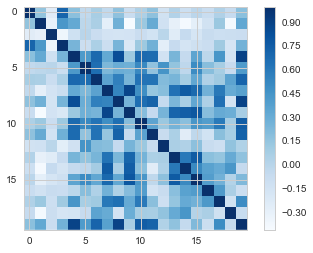

In [217]:
#Computes pairwise correlation of columns, excluding NA/null values

#    Correlation is Positive when the values increase together, and
#    Correlation is Negative when one value decreases as the other increases

corr = Crime_data.corr()
plt.imshow(corr, cmap = 'Blues', interpolation = 'none')
plt.colorbar()
plt.savefig('correlationpairs.png')

In [218]:
data2 = Crime_data

In [219]:
del data2['Neighborhood']

In [220]:
Crime_data2 = data2.dropna()

In [221]:
from sklearn import feature_selection as f_select
from sklearn import linear_model as lm
from sklearn import cross_validation as cv
from sklearn import metrics

In [222]:
# Make sure the data is in a dataframe
df_Condo_predictor3 = pd.DataFrame(Crime_data2)

# List all the columns in the dataframe
x_columns = list(df_Condo_predictor3.columns)

# Explictly define the y_column
y_column = 'Market Value per SqFt'

# Remove the y column from the list of columns
x_columns.remove(y_column)

# Define an empty list to put the relevant features that will predict the target variable
significant_columns = []

# Define another empty list to put the pvalues
pvals = []

#print x_columns
# A small script that will go through each of the columns in the dataframe and run a regression analysis on the feature and the
# predictor data sets. It will calculate the p-values and a f-statistic, which is a comparison of this how this data fits vs 
# the same data set with less information. If the p values are below 0.05 then we will append that feature and its p-value.

for feature in x_columns:
    pval = f_select.f_regression(df_Condo_predictor3[[feature]], df_Condo_predictor3[y_column])
    if pval[1][0] < 0.05:
        significant_columns.append(feature)
        pvals.append(pval[1][0])

In [223]:
# Now going to split the arrays and data frames into two unique and random sets.
x_train, x_test, y_train, y_test = cv.train_test_split(df_Condo_predictor3[significant_columns], df_Condo_predictor3[y_column],
                                                       test_size=0.8,random_state=1234)

#Fit the model using the Ridge() model
model2 = lm.Ridge().fit(x_train, y_train)

In [224]:
# Print out the results of the test
print pd.DataFrame({
    'column': significant_columns,
    'coef': model2.coef_,
    'p-value': pvals,
}).set_index('column')

                                     coef       p-value
column                                                 
Total Units                     -0.114117  9.383956e-08
Building Age                    -0.317360  2.043842e-12
Estimated Gross Income Log      16.389650  4.534547e-46
Taxi Complaint                  -0.017395  1.662819e-22
Noise - Vehicle                 -1.481904  1.349025e-17
Street Condition                 0.079993  3.308977e-17
Noise - Street/Sidewalk          0.128582  4.230366e-36
Sidewalk Condition              -0.034104  1.371783e-04
Traffic                          0.388220  3.888997e-22
Graffiti                         0.029997  8.776661e-05
Elevator                        -0.224764  5.509490e-19
School Maintenance               3.710313  5.374129e-33
DOF Property - Reduction Issue  -0.695815  1.173302e-16
Root/Sewer/Sidewalk Condition    0.896545  2.569315e-05
Overgrown Tree/Branches          2.439971  2.267330e-04
Construction                   -10.392431  2.063

In [225]:
# Compare the training data sets r^2 value for a group of features and the target value
print model2.score(x_train, y_train)
print metrics.r2_score(y_train, model2.predict(x_train))

0.66509347003
0.66509347003


## Build a Classification Tree

In [226]:
df_Condo_predictor3.columns

Index([u'Total Units', u'Market Value per SqFt', u'Building Age', u'Estimated Gross Income Log', u'Taxi Complaint', u'Noise - Commercial', u'Food Establishment', u'Noise - Vehicle', u'Street Condition', u'Noise - Street/Sidewalk', u'Sidewalk Condition', u'Traffic', u'Graffiti', u'Elevator', u'School Maintenance', u'DOF Property - Reduction Issue', u'Root/Sewer/Sidewalk Condition', u'Overgrown Tree/Branches', u'Construction', u'Noise'], dtype='object')

In [227]:
# Make a copy of the dataframe
data_tree = df_Condo_predictor3
data_tree.head(5)

,Total Units,Market Value per SqFt,Building Age,Estimated Gross Income Log,Taxi Complaint,Noise - Commercial,Food Establishment,Noise - Vehicle,Street Condition,Noise - Street/Sidewalk,Sidewalk Condition,Traffic,Graffiti,Elevator,School Maintenance,DOF Property - Reduction Issue,Root/Sewer/Sidewalk Condition,Overgrown Tree/Branches,Construction,Noise
0,42,200.00,91,14.102654,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
1,78,242.76,26,15.707606,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
2,282,271.23,81,16.281601,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
3,13,224.38,91,14.250965,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
4,452,256.13,55,16.493176,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16


In [228]:
# look for missing values

# There should be none.
data_tree.isnull().sum()

Total Units                       0
Market Value per SqFt             0
Building Age                      0
Estimated Gross Income Log        0
Taxi Complaint                    0
Noise - Commercial                0
Food Establishment                0
Noise - Vehicle                   0
Street Condition                  0
Noise - Street/Sidewalk           0
Sidewalk Condition                0
Traffic                           0
Graffiti                          0
Elevator                          0
School Maintenance                0
DOF Property - Reduction Issue    0
Root/Sewer/Sidewalk Condition     0
Overgrown Tree/Branches           0
Construction                      0
Noise                             0
dtype: int64

In [229]:
# create a list of feature columns
feature_cols = ['Total Units','Building Age','Estimated Gross Income Log','Taxi Complaint','Noise - Commercial',
                'Food Establishment','Noise - Vehicle','Street Condition','Noise - Street/Sidewalk','Sidewalk Condition',
                'Traffic','Graffiti','Elevator','School Maintenance','DOF Property - Reduction Issue',
                'Root/Sewer/Sidewalk Condition','Overgrown Tree/Branches','Construction','Noise']



In [230]:
# define X
X = data_tree[feature_cols]

In [231]:
X.head(5)

,Total Units,Building Age,Estimated Gross Income Log,Taxi Complaint,Noise - Commercial,Food Establishment,Noise - Vehicle,Street Condition,Noise - Street/Sidewalk,Sidewalk Condition,Traffic,Graffiti,Elevator,School Maintenance,DOF Property - Reduction Issue,Root/Sewer/Sidewalk Condition,Overgrown Tree/Branches,Construction,Noise
0,42,91,14.102654,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
1,78,26,15.707606,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
2,282,81,16.281601,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
3,13,91,14.250965,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
4,452,55,16.493176,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16


In [232]:
# These are the feature columns

X.columns = ['Total_Units','Building_Age','Estimated_Gross_Income_Log','Taxi_Complaint','Noise_Commercial',
                'Food_Establishment','Noise_Vehicle','Street_Condition','Noise_Street/Sidewalk','Sidewalk_Condition',
                'Traffic','Graffiti','Elevator','School_Maintenance','DOF_Property_Reduction_Issue',
                'Root_Sewer_Sidewalk_Condition','Overgrown_Tree_Branches','Construction','Noise']

In [233]:
X.head(5)

,Total_Units,Building_Age,Estimated_Gross_Income_Log,Taxi_Complaint,Noise_Commercial,Food_Establishment,Noise_Vehicle,Street_Condition,Noise_Street/Sidewalk,Sidewalk_Condition,Traffic,Graffiti,Elevator,School_Maintenance,DOF_Property_Reduction_Issue,Root_Sewer_Sidewalk_Condition,Overgrown_Tree_Branches,Construction,Noise
0,42,91,14.102654,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
1,78,26,15.707606,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
2,282,81,16.281601,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
3,13,91,14.250965,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16
4,452,55,16.493176,13,2,1,1,1,2,1,0,0,0,0,0,0,0,0,16


In [234]:
# define the y column
y = data_tree['Market Value per SqFt']

In [235]:
y.columns = ['Market_Value_per_SqFt']
data_tree['Market Value per SqFt'].head(5)

0    200.00
1    242.76
2    271.23
3    224.38
4    256.13
Name: Market Value per SqFt, dtype: float64

In [236]:
# fit a classification tree with max_depth=4 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=1, splitter='best')

In [237]:
# create a Graphviz file
from sklearn.tree import export_graphviz
from sklearn import tree

tree.export_graphviz(treereg,out_file = 'Condo_1.png')

In [238]:
#with open("Condo_1.dot", 'wb') as f:
#    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols)

<img src="img/Condo_1.png">

In [239]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,Total Units,0.013493
1,Building Age,0.139603
2,Estimated Gross Income Log,0.199819
3,Taxi Complaint,0.000000
4,Noise - Commercial,0.000000
5,Food Establishment,0.000000
6,Noise - Vehicle,0.062756
7,Street Condition,0.083830
8,Noise - Street/Sidewalk,0.442661
9,Sidewalk Condition,0.053844


In [240]:
# split into train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [241]:
# print out each of the arrays
print X_train
print y_train
print X_test
print y_test

[[  4.20000000e+01   9.10000000e+01   1.41026537e+01 ...,   0.00000000e+00
    0.00000000e+00   1.60000000e+01]
 [  2.30000000e+01   5.50000000e+01   1.27418903e+01 ...,   2.90000000e+01
    0.00000000e+00   1.10600000e+03]
 [  2.30000000e+01   5.90000000e+01   1.28643178e+01 ...,   1.00000000e+01
    1.00000000e+00   5.57000000e+02]
 ..., 
 [  9.00000000e+00   9.60000000e+01   1.30668147e+01 ...,   2.00000000e+00
    2.00000000e+00   5.94000000e+02]
 [  1.02000000e+02   8.30000000e+01   1.51769708e+01 ...,   1.00000000e+01
    1.00000000e+00   5.57000000e+02]
 [  1.33000000e+02   2.50000000e+01   1.54501652e+01 ...,   2.00000000e+00
    2.00000000e+00   5.94000000e+02]]
[ 200.    189.87  126.13  160.13  213.5   237.44  163.85  213.61  247.47
  167.67  202.05  323.91  158.38  119.57  253.07  141.97  154.79  132.55
  237.64  105.63  219.58  180.95  218.79  158.89  211.18  197.93  197.21
  217.12  116.89  170.8   189.93  229.57  235.84  215.96  239.72  149.97
   95.21  222.83   74.65  13

In [242]:
# import class, instantiate estimator, fit with training set
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(compute_importances=None, criterion='mse',
           max_depth=None, max_features=None, max_leaf_nodes=None,
           min_density=None, min_samples_leaf=1, min_samples_split=2,
           random_state=1, splitter='best')

In [243]:
# make predictions
preds = treereg.predict(X_test)

# print predictions and actual values
print preds
print y_test

[ 232.06  222.33  170.29  126.93  276.24  153.52  224.38  139.85  184.84
  206.64  118.49   33.17  285.86  177.41  189.87  209.32   74.63  116.96
  188.11  177.28  215.64  107.89  188.03  265.98  224.38  223.26  211.49
  285.86  126.93  163.85   95.21   74.65  137.12  213.61  232.06  104.13
  202.2   126.13  113.25  232.27  242.87  133.91  180.48  163.15  244.83
  215.26  163.85  250.61  277.82  206.66  247.98  225.7   242.87  112.53
  249.15  211.92  206.64  209.32  161.69  247.98   75.35  239.72  190.54
  170.8   145.36   68.03  219.25  158.38  163.15  232.27  250.37  127.48
  179.37   75.35  176.79   65.33  182.34   95.2   211.92  255.08  105.06
  186.44  247.47  190.54   95.2    95.2   152.77  259.67  183.6   137.12
  153.52  247.48   95.2   239.6   177.94   95.2   215.05   95.2   239.6
  163.15  197.78  170.95  132.55   95.2    95.2   143.72   95.2   247.98
  197.78  147.47  202.87  119.28   94.37  194.88  209.32  209.03  254.53
  133.91  118.78  259.56   54.69  119.57   95.2    9

In [244]:
# print RMSE
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, preds))

44.545803721188669

In [245]:
# use cross-validation to find best max_depth
from sklearn.cross_validation import cross_val_score

In [246]:
# try max_depth=2
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

69.047696059212953

In [247]:
# try max_depth=3
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

70.227635435452612

In [248]:
# try max_depth=4
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

64.266818089715201

In [249]:
# try max_depth=5
treereg = DecisionTreeRegressor(max_depth=5, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

74.276032343279198

In [250]:
# max_depth=4 was best, so fit a tree using that parameter with ALL DATA
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(compute_importances=None, criterion='mse', max_depth=4,
           max_features=None, max_leaf_nodes=None, min_density=None,
           min_samples_leaf=1, min_samples_split=2, random_state=1,
           splitter='best')

Best score: 64.2668180897
Best depth: 4


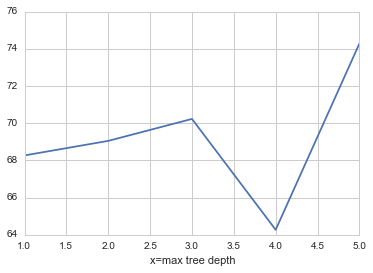

In [251]:
% matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

all_scores = []
best_score = -1
best_depth = 0
for i in range(1, 6):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
treereg = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
treereg.fit(X, y)

plt.figure()
plt.plot(range(1, 6), all_scores)
plt.xlabel('x=max tree depth')
plt.savefig('depthpic.png')

In [252]:
# compute the "Gini importance" of each feature: the (normalized) total reduction of MSE brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,Total Units,0.013493
1,Building Age,0.139603
2,Estimated Gross Income Log,0.199819
3,Taxi Complaint,0.000000
4,Noise - Commercial,0.000000
5,Food Establishment,0.000000
6,Noise - Vehicle,0.062756
7,Street Condition,0.083830
8,Noise - Street/Sidewalk,0.442661
9,Sidewalk Condition,0.053844


In [253]:
# create a Graphviz file
from sklearn.tree import export_graphviz
from sklearn import tree

tree.export_graphviz(treereg,out_file = 'Condo_4.png')